In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_excel('../data/Urban_Mobility_Patterns_Data.xlsx', sheet_name='Sheet1')
df.head()

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
0,27.490802,5.904533,14.945633,49.967024
1,39.014286,7.101535,13.316484,74.674677
2,34.639879,12.818211,7.046157,56.266678
3,31.973170,5.100066,24.290667,8.330258
4,23.120373,13.044745,19.064966,18.558024


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average_Speed             4880 non-null   float64
 1   Waiting_Time              5000 non-null   float64
 2   Daily_Commute_Distance    4880 non-null   float64
 3   Traffic_Congestion_Score  5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB


In [4]:
df.isnull().sum()

Average_Speed               120
Waiting_Time                  0
Daily_Commute_Distance      120
Traffic_Congestion_Score      0
dtype: int64

In [8]:
# print rows with missing values
df[df.isnull().any(axis=1)]

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
59,NaN,5.205035,NaN,43.838090
70,NaN,8.292223,NaN,93.309407
111,NaN,12.976066,NaN,74.423526
194,NaN,3.072036,NaN,24.854931
275,NaN,3.412224,NaN,48.600345
...,...,...,...,...
4863,NaN,12.090248,NaN,99.456557
4890,NaN,10.755719,NaN,15.509427
4911,NaN,13.622844,NaN,10.244212
4963,NaN,8.249685,NaN,90.297672


In [29]:
df_clean = df.dropna()
df_only_null = df[~df.index.isin(df_clean.index)]

In [33]:
df_clean.head()

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
0,27.490802,5.904533,14.945633,49.967024
1,39.014286,7.101535,13.316484,74.674677
2,34.639879,12.818211,7.046157,56.266678
3,31.973170,5.100066,24.290667,8.330258
4,23.120373,13.044745,19.064966,18.558024


In [30]:
df_only_null.head()

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
59,NaN,5.205035,NaN,43.838090
70,NaN,8.292223,NaN,93.309407
111,NaN,12.976066,NaN,74.423526
194,NaN,3.072036,NaN,24.854931
275,NaN,3.412224,NaN,48.600345


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train_clean_avgspeed, X_test_clean_avgspeed, y_train_clean_avgspeed, y_test_clean_avgspeed = train_test_split(df_clean[['Waiting_Time', 'Traffic_Congestion_Score']], df_clean[['Average_Speed']], test_size=0.2, random_state=42)

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def find_best_k(X_train, y_train, X_test, y_test, k_range=(1, 10)):
    error_rate = []
    for i in range(k_range[0], k_range[1]):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.sqrt(mean_squared_error(y_test, pred_i)))

    plt.figure(figsize=(10, 6))
    plt.plot(range(k_range[0], k_range[1]), error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('RMSE vs. K Value')
    plt.xlabel('K')
    plt.ylabel('RMSE')
    plt.show()

    # print the best k
    best_k = error_rate.index(min(error_rate)) + 1
    print("Minimum RMSE:", min(error_rate), "at K =", best_k)
    
    return best_k


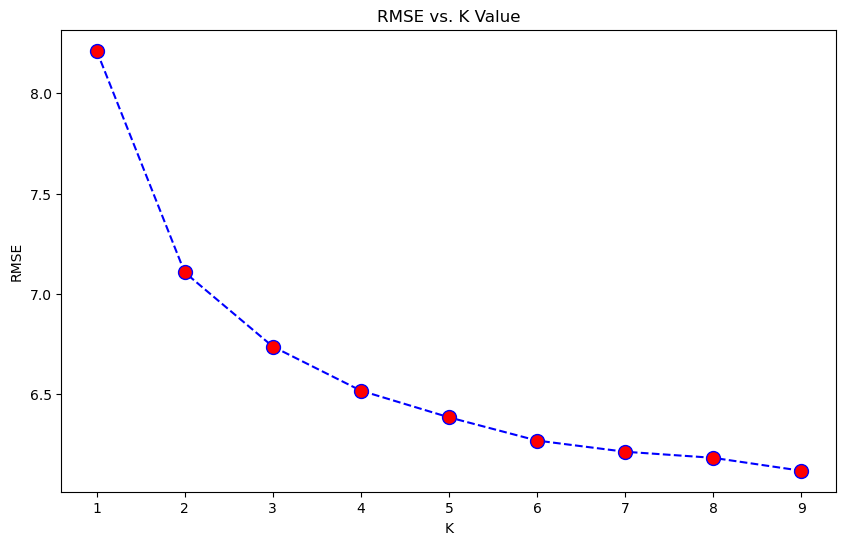

Minimum RMSE: 6.1187991868601035 at K = 9


In [59]:
bestK_clean_avgspeed = find_best_k(X_train_clean_avgspeed, y_train_clean_avgspeed, X_test_clean_avgspeed, y_test_clean_avgspeed)

In [60]:
# train the model with the best k
knn = KNeighborsRegressor(n_neighbors=bestK_clean_avgspeed)
knn.fit(X_train_clean_avgspeed,y_train_clean_avgspeed)
pred = knn.predict(X_test_clean_avgspeed)
print('RMSE:',np.sqrt(mean_squared_error(y_test_clean_avgspeed,pred)))

RMSE: 6.1187991868601035


In [61]:
# predict the missing values and add them to the original dataframe
df_only_null['Average_Speed'] = knn.predict(df_only_null[['Waiting_Time', 'Traffic_Congestion_Score']])
df_only_null.head()

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_44601/628871069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_null['Average_Speed'] = knn.predict(df_only_null[['Waiting_Time', 'Traffic_Congestion_Score']])


,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
59,26.533994,5.205035,NaN,43.838090
70,32.250248,8.292223,NaN,93.309407
111,31.243225,12.976066,NaN,74.423526
194,30.776031,3.072036,NaN,24.854931
275,31.977573,3.412224,NaN,48.600345


In [64]:
X_train_clean_comdis, X_test_clean_comdis, y_train_clean_comdis, y_test_clean_comdis = train_test_split(df_clean[['Waiting_Time', 'Traffic_Congestion_Score', 'Average_Speed']], df_clean[['Daily_Commute_Distance']], test_size=0.2, random_state=42)

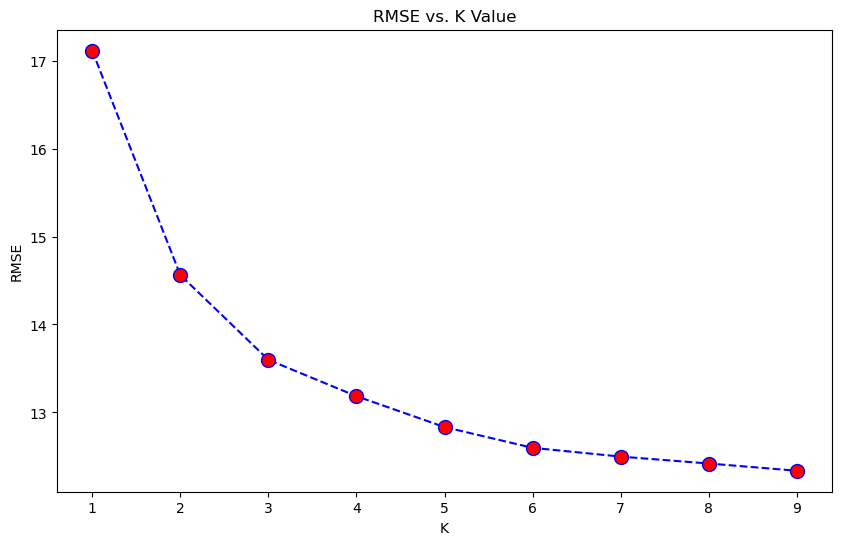

Minimum RMSE: 12.336483567303242 at K = 9


In [65]:
bestK_clean_comdis = find_best_k(X_train_clean_comdis, y_train_clean_comdis, X_test_clean_comdis, y_test_clean_comdis)

In [66]:
# train the model with the best k
knn = KNeighborsRegressor(n_neighbors=bestK_clean_comdis)
knn.fit(X_train_clean_comdis,y_train_clean_comdis)
pred = knn.predict(X_test_clean_comdis)
print('RMSE:',np.sqrt(mean_squared_error(y_test_clean_comdis,pred)))

RMSE: 12.336483567303242


In [67]:
# predict the missing values and add them to the original dataframe
df_only_null['Daily_Commute_Distance'] = knn.predict(df_only_null[['Waiting_Time', 'Traffic_Congestion_Score', 'Average_Speed']])
df_only_null.head()

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_44601/1938479270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_null['Daily_Commute_Distance'] = knn.predict(df_only_null[['Waiting_Time', 'Traffic_Congestion_Score', 'Average_Speed']])


,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
59,26.533994,5.205035,24.934953,43.838090
70,32.250248,8.292223,22.224499,93.309407
111,31.243225,12.976066,20.197395,74.423526
194,30.776031,3.072036,17.448805,24.854931
275,31.977573,3.412224,11.781525,48.600345


In [68]:
# combine the original dataframe with the one containing the predicted values
df = pd.concat([df_clean, df_only_null])
df.head()

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
0,27.490802,5.904533,14.945633,49.967024
1,39.014286,7.101535,13.316484,74.674677
2,34.639879,12.818211,7.046157,56.266678
3,31.973170,5.100066,24.290667,8.330258
4,23.120373,13.044745,19.064966,18.558024


In [69]:
df.isnull().sum()

Average_Speed               0
Waiting_Time                0
Daily_Commute_Distance      0
Traffic_Congestion_Score    0
dtype: int64